# Tensor Operations

When developing Neural Networks (NNs) or extracting information or results from NNs, moving tensors from and to specific devices, changing its shape and more are really common operations. This notebook covers basic tensors operations.

In [1]:
# Ensures versions are correct
! pip install torch==2.3.0 numpy==1.25.2 pillow==9.4.0 torchvision==0.18

import torch
import torchvision
import numpy as np
import PIL

print(f"Torch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"GPU enabled: {torch.cuda.is_available()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.7 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 29.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 5.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.9 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━

Torch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
Numpy version: 1.26.4
PIL version: 10.4.0
GPU enabled: True


## Devices and Dtypes

Torch have two classes that need to be introduced for the next steps.

### Devices

The first class objects can be obtained using the `torch.device()` method. It is used to represent physical devices like CPUs, GPUs and TPUs.

In [2]:
device = torch.device("cpu")
device

device(type='cpu')

In [3]:
device = torch.device("gpu")
device

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, ort, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: gpu

Oops, let's fix this. Now we can see the full list of expected values, though

In [4]:
device = torch.device("cuda")
device

device(type='cuda')

In [5]:
# if you have multiple gpus, you can specify to which gpu you are referring to
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [6]:
# second gpu in the machine
device = torch.device("cuda:1")
device

device(type='cuda', index=1)

In [7]:
device = torch.device("cpu:0")
device

device(type='cpu', index=0)

As we can see, we can use the torch.device() to create representations of devices, which is useful for some types of transformations or operations in a tensor.

### Dtypes

Dtypes are a way of defining how data will be stored by the tensor.

In [8]:
dtype = torch.float
dtype

torch.float32

In [9]:
dtype = torch.float64
dtype

torch.float64

In [10]:
dtype = torch.float32
dtype

torch.float32

In [11]:
dtype = torch.float16
dtype

torch.float16

In [12]:
dtype = torch.int
dtype

torch.int32

In [13]:
dtype = torch.int64
dtype

torch.int64

In [14]:
dtype = torch.int32
dtype

torch.int32

In [15]:
dtype = torch.int16
dtype

torch.int16

In [16]:
dtype = torch.bfloat16
dtype

torch.bfloat16

In [17]:
dtype.is_floating_point

True

In [18]:
dtype = torch.complex128
dtype

torch.complex128

In [19]:
dtype.is_complex

True

As we can see, we can obtain various dtypes using these properties. These will be useful later

## Moving tensors from and to devices, and changing types

This is one of the most common "operations" when using NNs for inference. If you want models or tensors to be hardware accelerated, you will have to move them to the GPU, for example.

### ".to()" method

This method takes a string or a torch.device() object. We will see later that it can also take dtypes, as this method can be used both for changing tensors 

#### Moving tensors from and to devices

In [20]:
x = torch.zeros((5,4))
x

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [21]:
x.device

device(type='cpu')

In [22]:
x = x.to("cuda")
x.device

device(type='cuda', index=0)

In [23]:
x = x.to("cpu")
x.device

device(type='cpu')

In [24]:
x = x.to("cuda:0")
x.device

device(type='cuda', index=0)

In [25]:
device = torch.device("cpu")
device

device(type='cpu')

In [26]:
print(x.device)
x = x.to(device)
x.device

cuda:0


device(type='cpu')

In [27]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [28]:
print(x.device)
x = x.to(device)
x.device

cpu


device(type='cuda', index=0)

#### Changing tensors dtypes

Now let's see how to use the `.to()` method to transform tensors into different dtypes, for different precisions.

In [29]:
torch.manual_seed(42)
x = torch.rand((5,4))
x

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274]])

In [30]:
x[0][0].item()

0.8822692632675171

In [31]:
x.dtype

torch.float32

In [32]:
dtype = torch.float64
x = x.to(dtype)
x[0][0].item()

0.8822692632675171

In [33]:
dtype = torch.float16
x = x.to(dtype)
x[0][0].item()

0.88232421875

In [34]:
torch.manual_seed(42)
x = torch.normal(
    size=(5,10),
    mean=10e-1000,
    std=10e10
)
x

tensor([[ 1.9269e+11,  1.4873e+11,  9.0072e+10, -2.1055e+11,  6.7842e+10,
         -1.2345e+11, -4.3067e+09, -1.6047e+11, -7.5214e+10,  1.6487e+11],
        [-3.9248e+10, -1.4036e+11, -7.2788e+10, -5.5943e+10, -7.6884e+10,
          7.6245e+10,  1.6423e+11, -1.5960e+10, -4.9740e+10,  4.3959e+10],
        [-7.5813e+10,  1.0783e+11,  8.0080e+10,  1.6806e+11,  1.2791e+11,
          1.2964e+11,  6.1047e+10,  1.3347e+11, -2.3162e+10,  4.1759e+09],
        [-2.5158e+10,  8.5986e+10, -1.3847e+11, -8.7124e+10,  7.8024e+09,
          5.2581e+10, -4.8799e+10,  1.1914e+11, -8.1401e+10, -7.3599e+10],
        [-8.3712e+10, -9.2239e+10, -6.3477e+09,  6.7561e+10, -9.7807e+09,
          1.8446e+11, -1.1845e+11,  1.3835e+11, -1.2024e+11,  7.0781e+10]])

In [35]:
torch.manual_seed(42)
x = torch.normal(
    size=(5,10),
    mean=10e-1000,
    std=10e10
)
x[0][0].item()

192691519488.0

In [36]:
torch.manual_seed(42)
x = torch.normal(
    size=(5,10),
    mean=10e-1000,
    std=10e10
)
print(x[0][0].item())
dtype = torch.int64
x = x.to(dtype)
x[0][0].item()

192691519488.0


192691519488

In [37]:
torch.manual_seed(42)
x = torch.normal(
    size=(5,10),
    mean=10e-1000,
    std=10e10
)
print(x[0][0].item())
dtype = torch.int32
x = x.to(dtype)
x[0][0].item()

192691519488.0


-2147483648

In [38]:
torch.manual_seed(42)
x = torch.normal(
    size=(5,10),
    mean=10e-1000,
    std=10e10
)
print(x[0][0].item())
dtype = torch.int16
x = x.to(dtype)
x[0][0].item()

192691519488.0


0

### Shorthands for moving to devices

Using the `.to()` method is one of the methods to move a tensor to another device, but another way to do this is to use the `.cpu()` and `.cuda()` methods

In [39]:
x = torch.zeros((5,4))
x.device

device(type='cpu')

In [40]:
x = x.cuda()
x.device

device(type='cuda', index=0)

In [41]:
x = x.cpu()
x.device

device(type='cpu')

## Tensor Shapes

In a lot of situations, changing the shapes of tensors is necessary to perform certain transformations.

### Adding dimensions (squeezing or unsqueezing) tensors

Squeezing or unsqueezing allows you to add a new dimension to a tensor, or remove dimensions which have shape 1.

Use unsqueeze to add a new dimension. You can use `.squeeze()` to remove all of the dimensions with shape=1, or pass a specific dimension as a parameter to define which dimension should be removed

In [42]:
torch.manual_seed(42)
x = torch.rand((5,))
print(x.shape)
x

torch.Size([5])


tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904])

In [43]:
x = x.unsqueeze(0)
print(x.shape)
x

torch.Size([1, 5])


tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904]])

In [44]:
x = x.squeeze()
print(x.shape)
x

torch.Size([5])


tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904])

In [45]:
x = x.unsqueeze(1)
print(x.shape)
x

torch.Size([5, 1])


tensor([[0.8823],
        [0.9150],
        [0.3829],
        [0.9593],
        [0.3904]])

In [46]:
x = x.unsqueeze(0)
print(x.shape)
x

torch.Size([1, 5, 1])


tensor([[[0.8823],
         [0.9150],
         [0.3829],
         [0.9593],
         [0.3904]]])

In [47]:
x = x.squeeze(0)
print(x.shape)
x

torch.Size([5, 1])


tensor([[0.8823],
        [0.9150],
        [0.3829],
        [0.9593],
        [0.3904]])

In [48]:
x = x.unsqueeze(0)
print(x.shape)
x

torch.Size([1, 5, 1])


tensor([[[0.8823],
         [0.9150],
         [0.3829],
         [0.9593],
         [0.3904]]])

In [49]:
x = x.squeeze()
print(x.shape)
x

torch.Size([5])


tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904])

### Tensor transpose

In [50]:
torch.manual_seed(42)
x = torch.rand((2, 3, 4))
print(x.shape)
x

torch.Size([2, 3, 4])


tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

In [51]:
x = x.transpose(2, 0)
print(x.shape)
x

torch.Size([4, 3, 2])


tensor([[[0.8823, 0.8694],
         [0.3904, 0.8854],
         [0.9408, 0.2696]],

        [[0.9150, 0.5677],
         [0.6009, 0.5739],
         [0.1332, 0.4414]],

        [[0.3829, 0.7411],
         [0.2566, 0.2666],
         [0.9346, 0.2969]],

        [[0.9593, 0.4294],
         [0.7936, 0.6274],
         [0.5936, 0.8317]]])

Using what we learned from the tensor math notebook:

In [52]:
torch.manual_seed(42)
a = torch.rand((2, 3))
print(x.shape)
a

torch.Size([4, 3, 2])


tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

In [53]:
b = torch.rand((2, 3))
print(x.shape)
b

torch.Size([4, 3, 2])


tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])

In [54]:
a @ b

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x3)

In [55]:
a @ b.transpose(0, 1)

tensor([[1.3127, 1.1999],
        [1.1213, 0.8494]])

As you can see, we can use the transpose of matrices to avoid a lot of erros. A lot of layers actually involve tensor dot products.

### Tensor Reshaping and Tensor Views

You may also want to keep the original data, but view it in a different shape, or reshape the tensor, creating a new copy. These operations are important in order to avoid errors when building neural networks.

PyTorch provides two options for reshaping tensors: `torch.reshape` and `torch.view`. To simplify when to use each, follow this:
 - If you just want to change the shape of a tensor, use `torch.reshape`. 
 - If you also want to reduce memory usage and ensure that the resulting tensor shares the same data as the original tensor, use `torch.view`.

For a deeper explanation, see both [the difference between reshape and view](https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch/54507446#54507446) and [what contiguous arrays are](https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays/26999092#26999092)

In [56]:
x = torch.zeros(3, 2)
x

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [57]:
a = x.reshape(6)

In [58]:
b = x.view(6)

In [59]:
print(a)
print(b)
print(x)

tensor([0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0.])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [60]:
# all of them share the same data, using a copy in memory in the same location, which means that any change in the values will also interfere with the others tensors.
x.fill_(1)
print(a)
print(b)
print(x)
print()

a.fill_(2)
print(a)
print(b)
print(x)
print()

b.fill_(3)
print(a)
print(b)
print(x)

tensor([1., 1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1.])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

tensor([2., 2., 2., 2., 2., 2.])
tensor([2., 2., 2., 2., 2., 2.])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

tensor([3., 3., 3., 3., 3., 3.])
tensor([3., 3., 3., 3., 3., 3.])
tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])


In [61]:
# .t() is a shorthand for transposing a matrice.
# transposing makes the tensor non-contiguous.
# .reshape() works with both contiguous tensors and non-contigous tensors
a = x.t().reshape(6)
b = x.view(6)

print(a)
print(b)
print(x)
print()

# for no
x.fill_(1)
print(a)
print(b)
print(x)
print()

# the .view() only works only with contiguous tensors, and throws and error when you try to use it in a non-contigous tensor
b = x.t().view(6)

tensor([3., 3., 3., 3., 3., 3.])
tensor([3., 3., 3., 3., 3., 3.])
tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

tensor([3., 3., 3., 3., 3., 3.])
tensor([1., 1., 1., 1., 1., 1.])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])



RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

### Torch.stack

We may also want to stack tensors together sometimes. For example, if you have multiple 2D tensors and want to create a 3D tensor out of it, one of the ways to do this is using the `torch.stack()`.

In [62]:
torch.manual_seed(42)
x = torch.randint(
    low=0,
    high=255,
    size=(3, 28, 28) # MNIST dimensions, 3 channels and 28x28. (C, H, W)
)
x = x.to(torch.float)
x, x.shape

(tensor([[[132., 167., 181.,  ..., 208., 146., 189.],
          [142.,  79., 207.,  ..., 189.,  61., 169.],
          [250., 179., 158.,  ...,  46.,  41., 108.],
          ...,
          [145.,  74.,  10.,  ...,  75., 118.,   0.],
          [ 48., 126.,  28.,  ...,  50., 122., 179.],
          [244.,  82., 122.,  ..., 175.,  74.,  58.]],
 
         [[  1.,  69., 112.,  ..., 219., 227.,  96.],
          [111.,  88., 149.,  ..., 213., 221.,  47.],
          [242.,  95., 145.,  ..., 117.,  38.,  16.],
          ...,
          [141., 146.,  10.,  ..., 170.,  91.,  20.],
          [ 15., 136., 244.,  ..., 156.,  33.,  68.],
          [105., 252., 134.,  ...,  11., 164.,  39.]],
 
         [[229., 102., 249.,  ..., 203.,  50.,  74.],
          [  3., 142., 120.,  ..., 112.,  13.,  63.],
          [163., 222.,  44.,  ..., 204.,  90., 120.],
          ...,
          [113., 160., 164.,  ...,  55.,  45., 109.],
          [179.,  36.,  30.,  ...,  45.,  69., 100.],
          [227., 163.,  65.,  .

In [63]:
# if you don't provide a dim, 0 will be the default one. 
a = torch.stack(
    tensors=[x, x, x, x],
    dim=0
)
# this would be the same as creating a batch of 4 images, in which each 
a, a.shape

(tensor([[[[132., 167., 181.,  ..., 208., 146., 189.],
           [142.,  79., 207.,  ..., 189.,  61., 169.],
           [250., 179., 158.,  ...,  46.,  41., 108.],
           ...,
           [145.,  74.,  10.,  ...,  75., 118.,   0.],
           [ 48., 126.,  28.,  ...,  50., 122., 179.],
           [244.,  82., 122.,  ..., 175.,  74.,  58.]],
 
          [[  1.,  69., 112.,  ..., 219., 227.,  96.],
           [111.,  88., 149.,  ..., 213., 221.,  47.],
           [242.,  95., 145.,  ..., 117.,  38.,  16.],
           ...,
           [141., 146.,  10.,  ..., 170.,  91.,  20.],
           [ 15., 136., 244.,  ..., 156.,  33.,  68.],
           [105., 252., 134.,  ...,  11., 164.,  39.]],
 
          [[229., 102., 249.,  ..., 203.,  50.,  74.],
           [  3., 142., 120.,  ..., 112.,  13.,  63.],
           [163., 222.,  44.,  ..., 204.,  90., 120.],
           ...,
           [113., 160., 164.,  ...,  55.,  45., 109.],
           [179.,  36.,  30.,  ...,  45.,  69., 100.],
           

Let's make this pratical, and visualize these tensors as images.

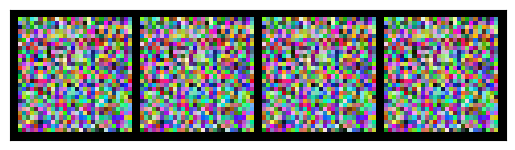

In [64]:
import torchvision
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np

# defines util function
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

# 4 images with 3 channels
grid = make_grid(a)
show(grid)

In [65]:
# would create a batch of 3 images, with 4 channels that are equal
b = torch.stack(
    tensors=[x, x, x, x],
    dim=1
)
b, b.shape

(tensor([[[[132., 167., 181.,  ..., 208., 146., 189.],
           [142.,  79., 207.,  ..., 189.,  61., 169.],
           [250., 179., 158.,  ...,  46.,  41., 108.],
           ...,
           [145.,  74.,  10.,  ...,  75., 118.,   0.],
           [ 48., 126.,  28.,  ...,  50., 122., 179.],
           [244.,  82., 122.,  ..., 175.,  74.,  58.]],
 
          [[132., 167., 181.,  ..., 208., 146., 189.],
           [142.,  79., 207.,  ..., 189.,  61., 169.],
           [250., 179., 158.,  ...,  46.,  41., 108.],
           ...,
           [145.,  74.,  10.,  ...,  75., 118.,   0.],
           [ 48., 126.,  28.,  ...,  50., 122., 179.],
           [244.,  82., 122.,  ..., 175.,  74.,  58.]],
 
          [[132., 167., 181.,  ..., 208., 146., 189.],
           [142.,  79., 207.,  ..., 189.,  61., 169.],
           [250., 179., 158.,  ...,  46.,  41., 108.],
           ...,
           [145.,  74.,  10.,  ...,  75., 118.,   0.],
           [ 48., 126.,  28.,  ...,  50., 122., 179.],
           

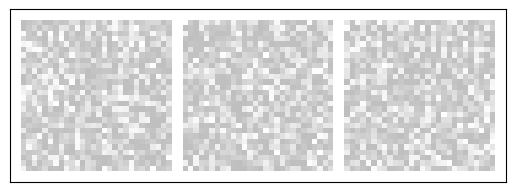

In [66]:
# 3 images with 4 channels. All the channels are the same, which means the image should be in grayscale
grid = make_grid(b)
show(grid)

In [67]:
c = torch.stack(
    tensors=[x, x, x, x],
    dim=2
)
c, c.shape

(tensor([[[[132., 167., 181.,  ..., 208., 146., 189.],
           [132., 167., 181.,  ..., 208., 146., 189.],
           [132., 167., 181.,  ..., 208., 146., 189.],
           [132., 167., 181.,  ..., 208., 146., 189.]],
 
          [[142.,  79., 207.,  ..., 189.,  61., 169.],
           [142.,  79., 207.,  ..., 189.,  61., 169.],
           [142.,  79., 207.,  ..., 189.,  61., 169.],
           [142.,  79., 207.,  ..., 189.,  61., 169.]],
 
          [[250., 179., 158.,  ...,  46.,  41., 108.],
           [250., 179., 158.,  ...,  46.,  41., 108.],
           [250., 179., 158.,  ...,  46.,  41., 108.],
           [250., 179., 158.,  ...,  46.,  41., 108.]],
 
          ...,
 
          [[145.,  74.,  10.,  ...,  75., 118.,   0.],
           [145.,  74.,  10.,  ...,  75., 118.,   0.],
           [145.,  74.,  10.,  ...,  75., 118.,   0.],
           [145.,  74.,  10.,  ...,  75., 118.,   0.]],
 
          [[ 48., 126.,  28.,  ...,  50., 122., 179.],
           [ 48., 126.,  28.,  ..., 

ValueError: pic should not have > 4 channels. Got 28 channels.

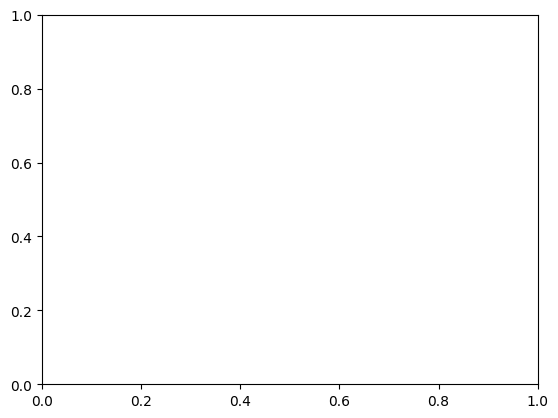

In [69]:
# 3 images with 28 channels, and shape 4x28
grid = make_grid(c)
show(grid)

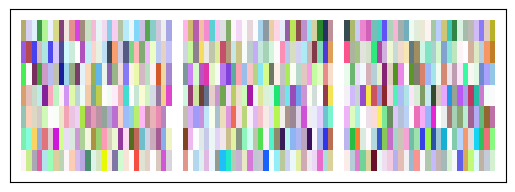

In [70]:
# let's use the previous learned methods to fix this
c = c.reshape(3, 4, 28, 28)
# 3 images, 4 channels, and 28x28 of size
grid = make_grid(c)
show(grid)

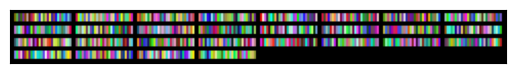

In [71]:
# let's play around a little bit more
c = c.reshape(28, 3, 4, 28)
# 28 images, with 3 channels, and shape 4x28
grid = make_grid(c)
show(grid)

## Max, min and other values

Sometimes it is useful to extract information from tensors. For example, extracting the index where the maximum value in classifiers can mean extracting the class that the model predicts.

### Max, min, mean and sum

Let's check how can we easily find these values on any tensor

In [72]:
torch.manual_seed(42)
x = torch.normal(mean=1.0, std=1e-2, size=(100, 100))
x

tensor([[1.0193, 1.0149, 1.0090,  ..., 1.0049, 1.0078, 1.0003],
        [1.0064, 1.0058, 1.0107,  ..., 1.0036, 1.0048, 1.0135],
        [1.0053, 1.0211, 0.9948,  ..., 1.0025, 1.0094, 1.0071],
        ...,
        [0.9973, 1.0149, 1.0086,  ..., 1.0079, 1.0006, 1.0009],
        [0.9956, 0.9989, 0.9940,  ..., 0.9989, 1.0186, 0.9778],
        [1.0093, 1.0165, 1.0138,  ..., 1.0082, 0.9915, 1.0079]])

In [73]:
x.max()

tensor(1.0422)

In [74]:
x.min()

tensor(0.9617)

In [75]:
x.mean()

tensor(1.0001)

In [76]:
x.sum()

tensor(10000.6445)

Another way is using the methods like `torch.max()` and `torch.mean()`

In [77]:
{
    "max": torch.max(x),
    "min": torch.min(x),
    "mean": torch.mean(x),
    "sum": torch.sum(x)
}

{'max': tensor(1.0422),
 'min': tensor(0.9617),
 'mean': tensor(1.0001),
 'sum': tensor(10000.6445)}

### Finding the position of the max and min values

This is important, for example, in classification, where the position of the max value represents the class it belongs to.

In [78]:
torch.manual_seed(42)
x = torch.normal(mean=1.0, std=1e4, size=(3, 2))
x

tensor([[  3367.9036,   1289.0940],
        [  2345.6235,   2304.3303],
        [-11227.5635,  -1862.2830]])

In [79]:
x.argmax()

tensor(0)

If you don't provide a dimension parameter to the `.argmax()` method, the tensor will be flattened and the resulting argmax value will be the index of the flattened tensor.

In [80]:
print(x.flatten())
x.flatten().argmax()

tensor([  3367.9036,   1289.0940,   2345.6235,   2304.3303, -11227.5635,
         -1862.2830])


tensor(0)

You can also define the dimention which should be used.

In [81]:
x.argmax(
    dim=0
)

tensor([0, 1])

In [82]:
x.argmax(
    dim=1
)

tensor([0, 0, 1])

As you can see, the argmax now returns the positional max based on the chosen dimensions. In other words, choosing `dim=0` will give you the maximum values per columns. Choosing `dim=1` will give you the maximum values per row. Let's check this on 3D tensors.

In [83]:
torch.manual_seed(42)
x = torch.normal(mean=1.0, std=1e4, size=(3, 2, 4))
x

tensor([[[ 19270.1523,  14873.8408,   9008.1719, -21054.2090],
         [  6785.1846, -12344.4492,   -429.6748, -16045.6699]],

        [[  3559.5991,  -6865.2300,  -4932.5635,   2415.8779],
         [-11108.0391,    916.4565, -23168.2266,  -2167.0474]],

        [[ -3096.2678,  -3956.1050,   8035.0933,  -6214.9536],
         [ -5919.0054,   -629.7438,  -8284.5430,   3309.9844]]])

In [84]:
x.argmax(
    dim=0
)

tensor([[0, 0, 0, 1],
        [0, 1, 0, 2]])

In [85]:
x.argmax(
    dim=1
)

tensor([[0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 1]])

In [86]:
x.argmax(
    dim=2
)

tensor([[0, 0],
        [0, 1],
        [2, 3]])

The `.argmin()` method have the same properties described above, but instead provides the position of the minimum values.

In [87]:
torch.manual_seed(42)
x = torch.normal(mean=1.0, std=1e4, size=(3, 2))
x

tensor([[  3367.9036,   1289.0940],
        [  2345.6235,   2304.3303],
        [-11227.5635,  -1862.2830]])

In [88]:
x.argmin()

tensor(4)

In [89]:
print(x.flatten())
x.flatten().argmin()

tensor([  3367.9036,   1289.0940,   2345.6235,   2304.3303, -11227.5635,
         -1862.2830])


tensor(4)

In [90]:
x.argmin(
    dim=0
)

tensor([2, 2])

In [91]:
x.argmin(
    dim=1
)

tensor([1, 1, 0])